<a href="https://colab.research.google.com/github/team0243/DWDM21/blob/main/Data103(Chapter3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #ทำงานกับข้อมูลลักษณะ ตาราง

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os #จัดการไฟล์และ path

In [5]:
path = '/content/drive/My Drive/DWDM2021_DATA'

In [6]:
data_cases = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


***Meta Data (Data อธิบาย Data)***

#ชี้ข้อมูลในตาราง

### ชี้แบบธรรมดาใช้[ชื่อ][colum]

In [7]:
data_cases[ 'risk' ]

0         คนต่างชาติเดินทางมาจากต่างประเทศ
1         คนต่างชาติเดินทางมาจากต่างประเทศ
2         คนต่างชาติเดินทางมาจากต่างประเทศ
3         คนต่างชาติเดินทางมาจากต่างประเทศ
4         คนต่างชาติเดินทางมาจากต่างประเทศ
                        ...               
543301                    ทัณฑสถาน/เรือนจำ
543302                    ทัณฑสถาน/เรือนจำ
543303                    ทัณฑสถาน/เรือนจำ
543304                    ทัณฑสถาน/เรือนจำ
543305                                 NaN
Name: risk, Length: 543306, dtype: object

In [8]:
data_cases[ 'risk' ][784]

'สนามมวย'

### ชี้แบบ .iloc[](มองข้อมูลเป็น matrix)

In [9]:
data_cases.iloc[678,8]

'สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้'

In [10]:
data_cases.iloc[-10:,[3,4,8]]

,sex,age,risk
543296,ชาย,47.0,ทัณฑสถาน/เรือนจำ
543297,ชาย,38.0,ทัณฑสถาน/เรือนจำ
543298,ชาย,39.0,ทัณฑสถาน/เรือนจำ
543299,ชาย,40.0,ทัณฑสถาน/เรือนจำ
543300,ชาย,38.0,ทัณฑสถาน/เรือนจำ
543301,ชาย,39.0,ทัณฑสถาน/เรือนจำ
543302,ชาย,37.0,ทัณฑสถาน/เรือนจำ
543303,ชาย,28.0,ทัณฑสถาน/เรือนจำ
543304,ชาย,26.0,ทัณฑสถาน/เรือนจำ
543305,NaN,NaN,NaN


In [11]:
data_cases.iloc[-10:,3:4:8]

,sex
543296,ชาย
543297,ชาย
543298,ชาย
543299,ชาย
543300,ชาย
543301,ชาย
543302,ชาย
543303,ชาย
543304,ชาย
543305,NaN


In [12]:
data_cases.describe()

,No.,age
count,543305.000000,491048.000000
mean,271653.000000,35.519252
std,156838.788338,16.197363
min,1.000000,1.000000
25%,135827.000000,25.000000
50%,271653.000000,34.000000
75%,407479.000000,46.000000
max,543305.000000,108.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7f3c9208f510>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3c9209a5d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c920a1610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c920a10d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3c9208fb10>,
  <matplotlib.lines.Line2D at 0x7f3c9209a090>]}

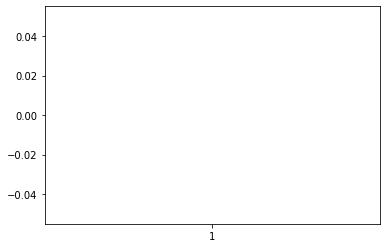

In [13]:
from matplotlib import pyplot as plt
plt.boxplot(data_cases['age']) # age มีข้อมูลที่ missing ทำให้ plot กราฟไม่ได้

###Missing Values

*NaN = Not a Number
*Null 
*Na = Not Available

In [14]:
data_cases.isnull()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,False,False,True,False,False,False,False,False,False,False,True
1,False,False,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,True
4,False,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
543301,False,False,False,False,False,False,True,False,False,False,True
543302,False,False,False,False,False,False,True,False,False,False,True
543303,False,False,False,False,False,False,True,False,False,False,True
543304,False,False,False,False,False,False,True,False,False,False,True


In [15]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


In [16]:
data_cases.isnull().any() #.any ช่วยสรุปข้อมูลให้เป็น column

No.                      True
announce_date            True
Notified date            True
sex                      True
age                      True
Unit                     True
nationality              True
province_of_isolation    True
risk                     True
province_of_onset        True
district_of_onset        True
dtype: bool

###Handling Missing Value1 (ลบค่าลบค่า missing ออกไป)

{'boxes': [<matplotlib.lines.Line2D at 0x7f3c91be7550>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3c91bee590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c91b745d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c91b74090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3c91be7ad0>,
  <matplotlib.lines.Line2D at 0x7f3c91bee050>]}

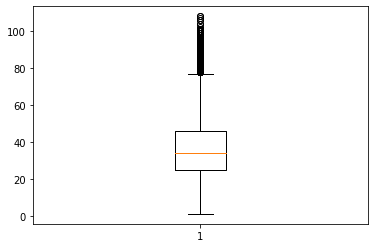

In [17]:
plt.boxplot(data_cases['age'].dropna()) #.dropna ช่วยลบค่า missing ออก

In [18]:
data_cases.dropna()

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
47,48.0,6/3/2020,4/3/2020,ชาย,43.0,ปี,United Kingdom,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,คลองตัน
124,125.0,6/3/2021,5/3/2021,หญิง,55.0,ปี,Thailand,ปทุมธานี,Cluster ตลาดพรพัฒน์,ปทุมธานี,ธัญบุรี
161,162.0,17/3/2020,21/3/2020,ชาย,14.0,ปี,Thailand,สุราษฎร์ธานี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,สุราษฎร์ธานี,เมือง
181,182.0,18/3/2020,15/3/2020,ชาย,33.0,ปี,Thailand,ขอนแก่น,สนามมวย,ขอนแก่น,เมือง
186,187.0,18/3/2020,16/3/2020,ชาย,36.0,ปี,Thailand,ร้อยเอ็ด,สนามมวย,ร้อยเอ็ด,เชียงขวัญ
...,...,...,...,...,...,...,...,...,...,...,...
543098,543099.0,28/7/2021,27/7/2021,หญิง,63.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นครปฐม,พุทธมณฑล
543099,543100.0,28/7/2021,27/7/2021,ชาย,67.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,หนองแขม
543100,543101.0,28/7/2021,27/7/2021,หญิง,68.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดุสิต
543101,543102.0,28/7/2021,27/7/2021,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ราษฎร์บูรณะ


In [19]:
data_cases.dropna().shape # ดูว่าข้อมูลมีทั้งหมดเท่าไร

(385643, 11)

In [20]:
data_cases.dropna().shape[0]

385643

Quiz 3 ให้หาว่าการทำ dropna() ทำให้ข้อมูลหายไปกี่ %


```
size before drop = 1000
size after drop = 10 
we lost 99% of data
```

In [21]:
removed = data_cases.shape[0] - data_cases.dropna().shape[0]

In [22]:
print(f'size before drop = {data_cases.shape[0]}')
print(f'size after drop = {data_cases.dropna().shape[0]}')
print(f'we lost {100*(removed/data_cases.shape[0])}% of data')

size before drop = 543306
size after drop = 385643
we lost 29.019189922437818% of data


### Handling Missing Value 1.5 (ลบค่า missing เฉพาะใน column ที่เราสนใจ)

In [23]:
data_cases_nomissingAge = data_cases.dropna(subset=['age'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f3c910e4a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3c910e7a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3c9106da90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3c9106d550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3c910e4f90>,
  <matplotlib.lines.Line2D at 0x7f3c910e7510>]}

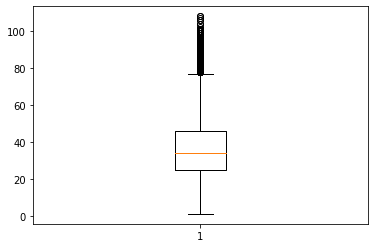

In [24]:
plt.boxplot(data_cases_nomissingAge['age'])

Quiz 3.1 ให้หาว่าการทำ dropna() แบบเลือก drop เฉพาะ column ที่เราสนใจ (age) ทำให้ข้อมูลหายไปกี่ %

In [25]:
removed = data_cases_nomissingAge.shape[0] - data_cases_nomissingAge.dropna().shape[0]

In [26]:
print(f'size before drop = {data_cases_nomissingAge.shape[0]}')
print(f'size after drop = {data_cases_nomissingAge.dropna().shape[0]}')
print(f'we lost {100*(removed/data_cases_nomissingAge.shape[0])}% of data')

size before drop = 491048
size after drop = 385643
we lost 21.465314999755623% of data


## Handling Missing Value 2 (แทนด้วย class ใหม่ (unknown))

In [27]:
data_cases

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


In [28]:
data_cases[['risk']] = data_cases[['risk']].fillna('ไม่มีข้อมูล')

In [29]:
set(data_cases['risk'])

{'2.สัมผัสผู้ติดเชื้อ',
 'ACF รองเมือง',
 'ACF สนามกีฬาธูปะเตมีย์',
 'ACF สนามกีฬาไทย-ญี่ปุ่น',
 'ACF สีลม',
 'ACF เคหะหลักสี่',
 'Cluster Icon siam',
 "Cluster Memory 90's กรุงเทพมหานคร",
 'Cluster New Jazz กรุงเทพมหานคร',
 'Cluster The Lounge Salaya',
 'Cluster กรุงเทพมหานคร. คลองเตย',
 'Cluster คลองเตย',
 'Cluster งานมอเตอร์ โชว์',
 'Cluster จนท. สนามบินสุวรรณภูมิ',
 'Cluster จันทบุรี',
 'Cluster จันทบุรี (ชาวกินี )',
 'Cluster จันทบุรี (ชาวกินี)',
 'Cluster ชลบุรี',
 'Cluster ชลบุรี บริษัทไดกิ้น',
 'Cluster ชลบุรี โรงเบียร์ 90',
 'Cluster ตราด',
 'Cluster ตราด ',
 'Cluster ตลาดนนทบุรี',
 'Cluster ตลาดบางพลี',
 'Cluster ตลาดบางแค',
 'Cluster ตลาดบางแค/คลองขวาง',
 'Cluster ตลาดพรพัฒน์',
 'Cluster ตลาดสี่มุมเมือง',
 'Cluster ทัณฑสถานหญิงกลาง',
 'Cluster ทัณฑสถานโรงพยาบาลราชทัณฑ์',
 'Cluster ทันฑสถานบำบัดพิเศษกลาง',
 'Cluster บริษัทศรีสวัสดิ์',
 'Cluster บางแค',
 'Cluster บ่อนพัทยา/ชลบุรี',
 'Cluster บ่อนเทพารักษ์',
 'Cluster บ่อนไก่อ่างทอง',
 'Cluster ปากช่อง',
 'Cluster ผับ Thonglor'

## Handling Missing Value 3 (แทนด้วย class ใหม่ (ค่าที่เหมาะสม))

In [30]:
set(data_cases['Unit'])

{' วัน', ' เดือน', nan, 'ปี', 'วัน', 'เดือน'}

In [31]:
data_cases[['Unit']] = data_cases[['Unit']].fillna('ปี?')

In [32]:
data_cases.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                       True
Unit                     False
nationality               True
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

## Handling Missing Value 4 (แทนด้วยค่ากลาง)

ถ้าเป็นnumeric ใช้ mean

In [37]:
#หาmean
data_cases[['age']].mean()
# เติม mean ลงไปแทนค่า missing

age    35.519252
dtype: float64

In [38]:
data_cases[['age']].dropna().mean()

age    35.519252
dtype: float64

In [55]:
# หา mean
avg_age = data_cases[['age']].mean()
# เติม mean ลงไปแทนค่า missing
data_cases[['age']] = data_cases[['age']].fillna(avg_age)

In [42]:
data_cases.isnull().any()

No.                       True
announce_date             True
Notified date             True
sex                       True
age                       True
Unit                     False
nationality               True
province_of_isolation     True
risk                     False
province_of_onset         True
district_of_onset         True
dtype: bool

In [43]:
data_cases[['age']].mean()

age    35.519252
dtype: float64

ถ้าเป็น nominal (ตัวหนังสือ) จะใช้ mode()

In [44]:
data_cases[['nationality']].mode()

,nationality
0,Thailand


In [50]:
data_cases[['nationality']].mode().iloc[0,0]

'Thailand'

In [51]:
data_cases['nationality'].mode()

0    Thailand
dtype: object

In [56]:
# หา mode
mode_nation = data_cases[['nationality']].mode().iloc[0,0]
# เติม mean ลงไปแทนค่า missing
data_cases[['nationality']] = data_cases[['nationality']].fillna(mode_nation)

In [ ]:
ถ้าเป็น ordinal (ตัวหนังสือ) จะใช้ medium()

# เติมด้วยค่าของ column ใกล้เคียง (เดี๋ยวย้อนกลับมา)

In [57]:
data_cases.head(20)

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
5,6.0,25/1/2020,NaN,หญิง,33.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
6,7.0,26/1/2020,NaN,หญิง,57.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
8,9.0,28/1/2020,NaN,ชาย,63.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
9,10.0,28/1/2020,NaN,หญิง,28.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,นนทบุรี,NaN


## Handling Missing Value 5 (แทนด้วย ค่ากลางของ samples ใน class เดียวกัน)

In [58]:
data_cases2 = pd.read_csv(os.path.join(path,'confirmed-cases.csv'))
data_cases2

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1.0,12/1/2020,NaN,หญิง,61.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4.0,22/1/2020,NaN,ชาย,68.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5.0,24/1/2020,NaN,หญิง,66.0,ปี,China,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543304,543305.0,28/7/2021,27/7/2021,ชาย,26.0,ปี,NaN,ปัตตานี,ทัณฑสถาน/เรือนจำ,ปัตตานี,NaN


# Select data by values [PD]

การเลือก record สามารถเลือกโดยใช้ ```list ของ boolean```(ความยาวของ list เท่ากับ จำนวน record)

``` ชื่อตาราง[list ของ boolean] ```

#### นำ list ของ boolean มาเลือกค่าในตาราง

In [59]:
data_cases2[data_cases2['risk'] == 'ทัณฑสถาน/เรือนจำ']

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
100018,100019.0,16/5/2021,15/5/2021,หญิง,26.0,ปี,Thailand,ฉะเชิงเทรา,ทัณฑสถาน/เรือนจำ,ฉะเชิงเทรา,เมืองฉะเชิงเทรา‎
100019,100020.0,16/5/2021,15/5/2021,หญิง,41.0,ปี,Thailand,ฉะเชิงเทรา,ทัณฑสถาน/เรือนจำ,ฉะเชิงเทรา,เมืองฉะเชิงเทรา‎
101468,101469.0,17/5/2021,16/5/2021,NaN,NaN,NaN,NaN,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
101469,101470.0,17/5/2021,16/5/2021,NaN,NaN,NaN,NaN,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
101470,101471.0,17/5/2021,16/5/2021,NaN,NaN,NaN,NaN,เชียงใหม่,ทัณฑสถาน/เรือนจำ,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543300,543301.0,28/7/2021,27/7/2021,ชาย,38.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543301,543302.0,28/7/2021,27/7/2021,ชาย,39.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543302,543303.0,28/7/2021,27/7/2021,ชาย,37.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN
543303,543304.0,28/7/2021,27/7/2021,ชาย,28.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN


สร้าง list ของ boolean

In [ ]:
data_cases2['age'] > 70

เลือก

In [60]:
data_cases2[data_cases2['age'] > 70]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
82,83.0,15/3/2020,NaN,ชาย,76.0,ปี,Thailand,กรุงเทพมหานคร,สนามมวย,กรุงเทพมหานคร,NaN
119,120.0,16/3/2020,NaN,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สนามมวย,ฉะเชิงเทรา,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543095,543096.0,28/7/2021,27/7/2021,หญิง,74.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,จอมทอง
543101,543102.0,28/7/2021,27/7/2021,ชาย,73.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ราษฎร์บูรณะ
543102,543103.0,28/7/2021,27/7/2021,หญิง,106.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ประเวศ
543270,543271.0,28/7/2021,27/7/2021,ชาย,78.0,ปี,NaN,สุพรรณบุรี,ทัณฑสถาน/เรือนจำ,สุพรรณบุรี,NaN


In [61]:
blist_age70up = data_cases2['age'] > 70

เราใช้ & (and) และ | (or) ในการรวม list ของ boolean

In [62]:
blist_female = data_cases2['sex'] == 'หญิง'
blist_female

0          True
1          True
2          True
3         False
4          True
          ...  
543301    False
543302    False
543303    False
543304    False
543305    False
Name: sex, Length: 543306, dtype: bool

In [63]:
blist_age70up & blist_female

0         False
1          True
2          True
3         False
4         False
          ...  
543301    False
543302    False
543303    False
543304    False
543305    False
Length: 543306, dtype: bool

In [64]:
data_cases2[blist_age70up & blist_female]

,No.,announce_date,Notified date,sex,age,Unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
1,2.0,17/1/2020,NaN,หญิง,74.0,ปี,China,กรุงเทพมหานคร,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3.0,22/1/2020,NaN,หญิง,73.0,ปี,Thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
7,8.0,26/1/2020,NaN,หญิง,73.0,ปี,China,ประจวบคีรีขันธ์,คนต่างชาติเดินทางมาจากต่างประเทศ,ประจวบคีรีขันธ์,หัวหิน
476,477.0,22/3/2020,21/3/2020,หญิง,72.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ภาษีเจริญ
564,565.0,22/3/2020,21/3/2020,หญิง,71.0,ปี,Thailand,นนทบุรี,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,นนทบุรี,NaN
...,...,...,...,...,...,...,...,...,...,...,...
543054,543055.0,28/7/2021,27/7/2021,หญิง,79.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ประเวศ
543086,543087.0,28/7/2021,27/7/2021,หญิง,84.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,บางบอน
543088,543089.0,28/7/2021,27/7/2021,หญิง,75.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ลาดพร้าว
543095,543096.0,28/7/2021,27/7/2021,หญิง,74.0,ปี,Thailand,กรุงเทพมหานคร,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,จอมทอง


## Quiz 4 + HW

หา records ต่อไปนี้

1. records ที่ กักตัวที่ขอนแก่น
2. records ที่ กักตัวที่ ขอนแก่น+โคราช+อุดร
3. records ที่ เป็นผู้หญิงที่พบเชื้อที่ กทม
4. records ที่ เป็นผู้ชาย อายุ 18-22 ปี ที่กักตัวที่เชียงใหม่



5. หาอายุเฉลี่ยของคนที่พบเชื้อที่ ขอนแก่น